In [1]:
!pip install pandas>=1.1.0

In [2]:
!pip install torchvision

In [3]:
# Only for Gooogle Colab
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 9.9MB/s 
     |████████████████████████████████| 194kB 24.4MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 1.0MB 16.9MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 40kB 6.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 2.6MB 52.6MB/s 


In [4]:
# Only for Google Colab
from fastbook import *

In [5]:
import os
from zipfile import ZipFile

In [6]:
# Run this cell if you are using Google Colab
# Upload the clean_vs_messy_room_dataset.zip file
from google.colab import files
files.upload()

Saving dataset.zip to dataset.zip


In [7]:
# Unzipping the dataset
zip = ZipFile('dataset.zip')
zip.extractall()
zip.close()

In [8]:
dataset_path = os.path.join('dataset/')

In [9]:
data_path = dataset_path + 'clean_and_messy_images/'
data_path

'dataset/clean_and_messy_images/'

In [14]:
no_images_dataset_clean = len(os.listdir(data_path+'Clean'))
no_images_dataset_Messy = len(os.listdir(data_path+'Messy'))
no_images_dataset_clean

106

In [15]:
no_train_images_dataset = no_images_dataset_clean + no_images_dataset_Messy
print("No. of images in dataset: ", no_train_images_dataset)
print("No. of images clean: ", no_images_dataset_clean)
print("No. of images Messy : ", no_images_dataset_Messy)


No. of images in dataset:  212
No. of images clean:  106
No. of images Messy :  106


In [16]:
from fastai.vision.all import *
path = os.path.join(dataset_path, 'clean_and_messy_images')

In [17]:
# The ImageDataLoaders will take all the images from the specified path
# and transform it as well as resize it  
dl_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [18]:
get_image_files(path)

(#212) [Path('dataset/clean_and_messy_images/Messy/messy_87.png'),Path('dataset/clean_and_messy_images/Messy/messy_5.png'),Path('dataset/clean_and_messy_images/Messy/messy_28.png'),Path('dataset/clean_and_messy_images/Messy/messy_71.png'),Path('dataset/clean_and_messy_images/Messy/messy_80.png'),Path('dataset/clean_and_messy_images/Messy/messy_6.png'),Path('dataset/clean_and_messy_images/Messy/messy_39.png'),Path('dataset/clean_and_messy_images/Messy/messy_100.png'),Path('dataset/clean_and_messy_images/Messy/messy_10.png'),Path('dataset/clean_and_messy_images/Messy/messy_45.png')...]

In [19]:
dls = dl_block.dataloaders(path)

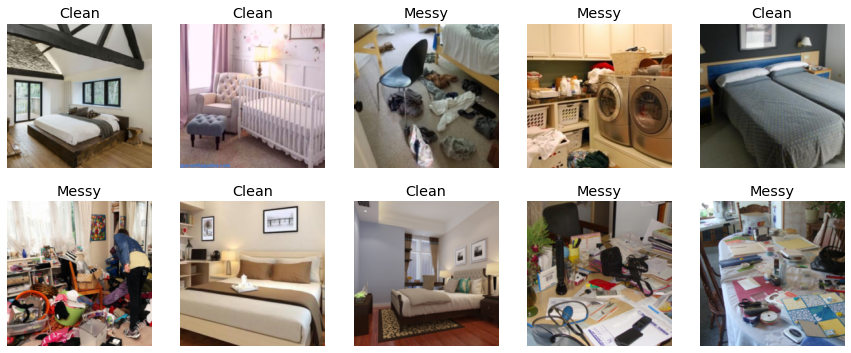

In [22]:
dls.valid.show_batch(max_n=10, nrows=2)

In [21]:
dl_block = dl_block.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dl_block.dataloaders(path)

In [24]:
model = cnn_learner(dls, resnet50, metrics=error_rate)
model.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.302619,0.626046,0.309524,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.400296,0.404443,0.166667,00:02
1,0.355896,0.249749,0.142857,00:02
2,0.274860,0.234410,0.095238,00:02
3,0.221281,0.173329,0.095238,00:02
4,0.185296,0.117493,0.023809,00:02
5,0.167205,0.100614,0.023809,00:02


In [25]:
# Only for Google Colab
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

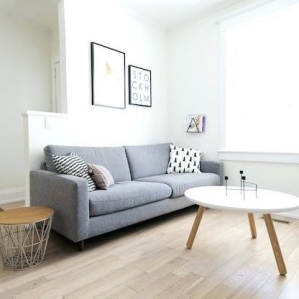

In [44]:
img = PILImage.create(uploader.data[0])
img

In [45]:
 model.predict(img)

('Clean', tensor(0), tensor([1.0000e+00, 3.9893e-08]))

In [46]:
# Using the uploaded image
is_clean_messy,_,probs = model.predict(img)
print(f"Is this Clean or Messy? :  {is_clean_messy}")
print(f"It's Messy: {probs[1] * 100}%     It's Clean: {probs[0] * 100}%")

Is this Clean or Messy? :  Clean
It's Messy: 3.989320703112753e-06%     It's Clean: 100.0%


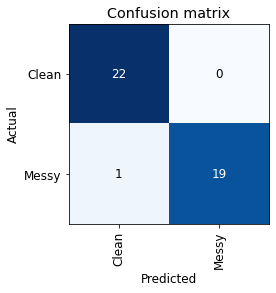

In [38]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [39]:
model.export("dataset/CleanMessyModel.pkl")

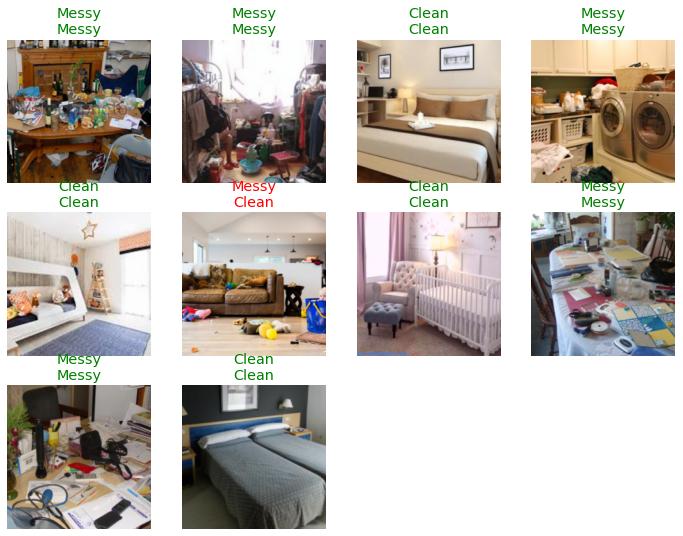

In [40]:
model.show_results(max_n=10)

In [41]:
test_dir = dataset_path + 'test/'

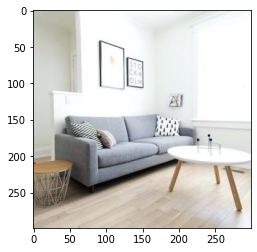

Is this Clean or Messy? :  Clean
It's Messy: 3.989320703112753e-06%     It's Clean: 100.0%


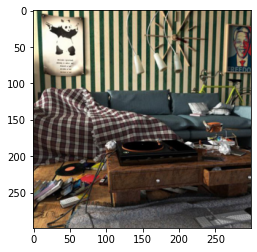

Is this Clean or Messy? :  Messy
It's Messy: 98.8877944946289%     It's Clean: 1.1122108697891235%


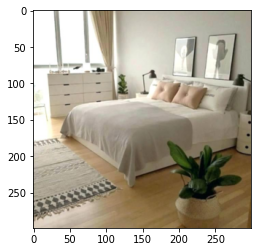

Is this Clean or Messy? :  Clean
It's Messy: 6.055944140825886e-06%     It's Clean: 99.99998474121094%


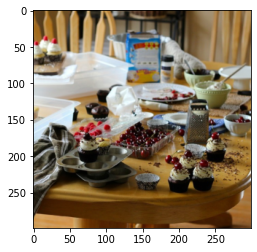

Is this Clean or Messy? :  Messy
It's Messy: 99.97562408447266%     It's Clean: 0.02437305822968483%


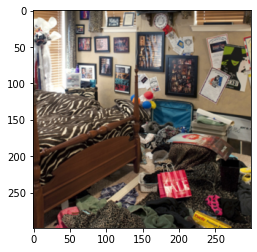

Is this Clean or Messy? :  Messy
It's Messy: 99.54277038574219%     It's Clean: 0.45722532272338867%


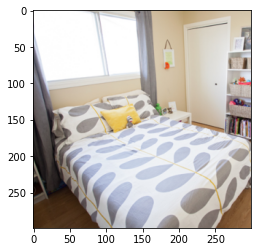

Is this Clean or Messy? :  Clean
It's Messy: 0.01856140047311783%     It's Clean: 99.9814453125%


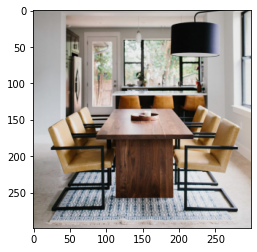

Is this Clean or Messy? :  Clean
It's Messy: 0.26836302876472473%     It's Clean: 99.73164367675781%


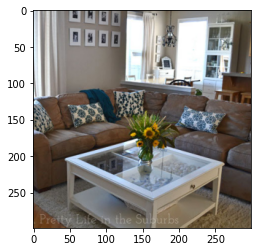

Is this Clean or Messy? :  Clean
It's Messy: 0.009274390526115894%     It's Clean: 99.99072265625%


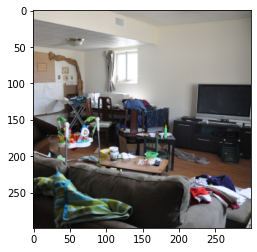

Is this Clean or Messy? :  Messy
It's Messy: 96.86874389648438%     It's Clean: 3.13124942779541%


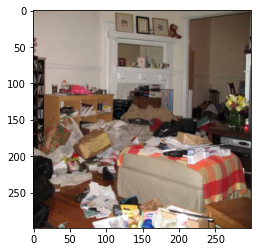

Is this Clean or Messy? :  Messy
It's Messy: 99.99745178222656%     It's Clean: 0.002545851282775402%


In [47]:
# Predictions for the images in the test dir
%matplotlib inline

test_images_list = os.listdir(test_dir)

for img in test_images_list:
  sn = SimpleNamespace(data = [test_dir + img])
  img = PILImage.create(sn.data[0])
  plt.figure()
  plt.imshow(img)
  plt.show()
  is_clean_messy,_,probs = model.predict(img)
  print(f"Is this Clean or Messy? :  {is_clean_messy}")
  print(f"It's Messy: {probs[1] * 100}%     It's Clean: {probs[0] * 100}%")